### 라이브러리 불러오기 

In [25]:
# 기본 데이터 분석을 위한 Library
import pandas as pd
import numpy as np

# 시각화 Library
import matplotlib.pyplot as plt
import seaborn as sns


# Sklearn에 있는 기본 데이터셋을 가져오기 위한
from sklearn import datasets

# warining 무시
import warnings
warnings.filterwarnings('ignore')

# sklearn의 PCA를 통해서 쉽게 PCA 적용가능
from sklearn.decomposition import PCA
# 그렇지 않으면 Matrix만들고 COV 구해서
# eigen_vector, eigen_value를 구해야하는 등 과정이 복잡해진다.

### 데이터 살펴보기 

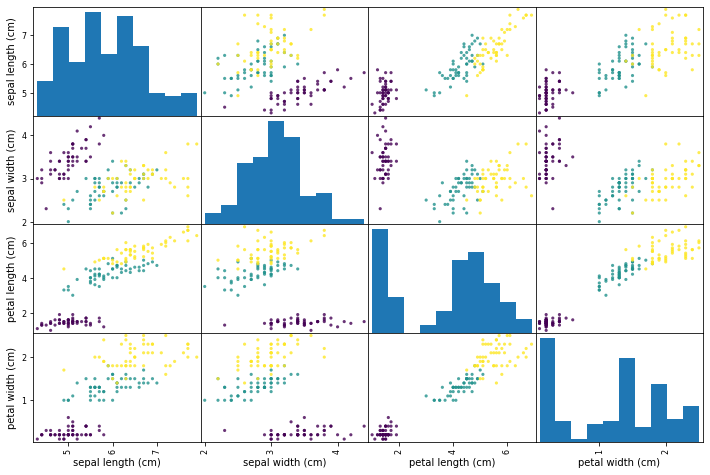

In [8]:
from pandas.plotting import scatter_matrix
'''pandas의 scatter_matrix 함수를 사용해서 데이터 전체를 한 번에 시각화 할 수 있음.'''

#loading dataset
iris = datasets.load_iris()
#creating data frame for pandas
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
scatter_matrix(dataframe, c=iris['target'],marker='o', s=10,alpha=.8, figsize=(12,8))
plt.show()

### Feature & Target 확인하기 

독립 변수가 어느 정도 정규분포를 따르는지, 종속 변수 값들이 적절한지 확인한다. 
- 종속 변수가 불균형하게 있으면(0:99개, 1:1개) PCA를 하는 의미가 없음.
- 독립 변수가 min값과 max값 쪽에 몰려있는 식으로 이분화되어 있으면, 이 또한 의미 없음.

따라서 기본적인 데이터의 상태를 확인해야 함. 

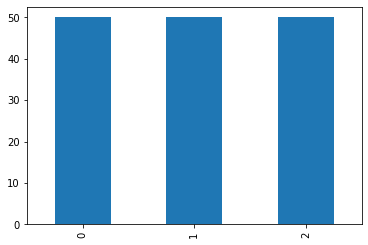

In [9]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

df_X = pd.DataFrame(X) # 독립변수
df_Y = pd.DataFrame(y) # 종속변수 (0 1 2)
df_Y[0].value_counts().plot(kind='bar') # 종속변수 plot
plt.show()

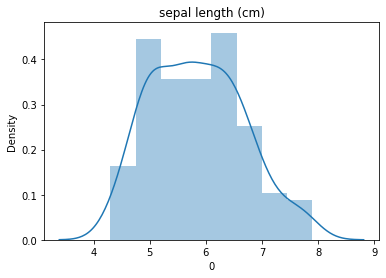

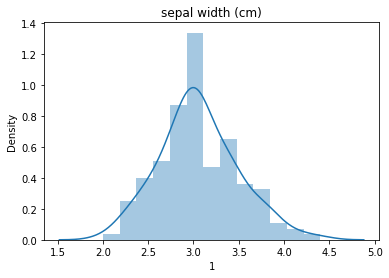

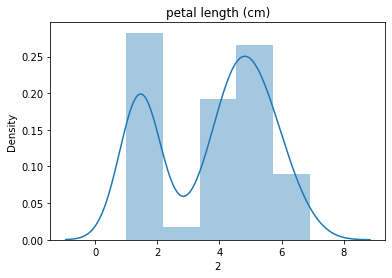

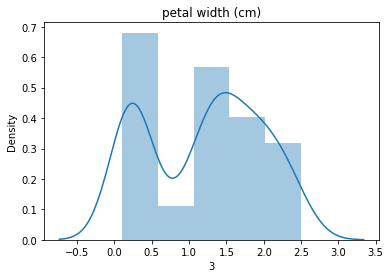

In [23]:
import seaborn as sns
for i in range(df_X.shape[1]): # 독립변수 plot
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

### PCA(주성분 분석: Principal Component Analysis)

In [34]:
# sklearn을 통해서 PCA 객체 생성 및 PC값을 구할 수 있습니다.
pca = PCA()
pca.fit(X)
PC_score = pca.transform(X)
PC_score.shape # (150, 4)

(150, 4)

In [32]:
# pca의 eigen_vector
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

### PC 값의 설명력 정도 

- PC값이 클수록 설명력 높음
- 첫번째 PC값이 가장 크므로 가장 설명력이 높은 축이고 마지막 두 개의 PC값은 작음.
- 특히 마지막 PC값의 경우 첫번째 PC값의 약 170배 정도의 설명력 차이를 보임.
- 즉, 설명력이 거의 없다고 생각할 수 있음.

In [35]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [39]:
# 비율로 확인
'''PC1이 92%의 설명력을 가지고 PC4가 0.5%의 설명력 가짐'''
ratio = pca.explained_variance_ratio_
ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

,V_ration
PC1,0.924619
PC2,0.053066
PC3,0.017103
PC4,0.005212


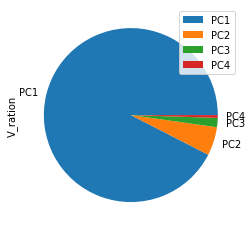

In [40]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

## PCA 분석

### feature에 따른 분포 확인

Text(0.5, 1.0, 'PCA of IRIS dataset')

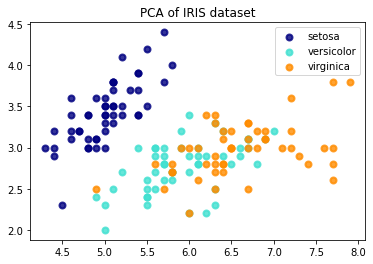

In [43]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

'''sepal length와 sepal width 2개의 feature를 축으로 시각화'''
for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

### PCA를 따른 데이터 분포 확인

Text(0.5, 1.0, 'PCA of IRIS dataset')

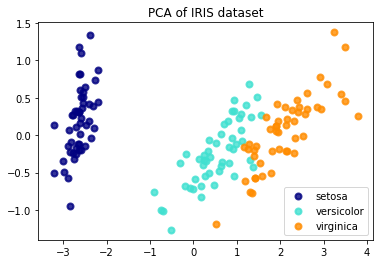

In [51]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

'''PC1, PC2에 의한 분포 확인'''
for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(PC_score[y == i, 0], PC_score[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

## Logistic Regression 적용

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [65]:
'''모든 변수를 사용하면 예측 성능에 차이가 없음'''
## Feature 4개
clf = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf.fit(X,y)
pred = clf.predict(X)
print(confusion_matrix(y,pred))

## PC score 4개
clf.fit(PC_score,y)
pred = clf.predict(PC_score)
print('\n',confusion_matrix(y,pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]

 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [70]:
'''일부 변수만 사용하면 예측 성능에 차이가 있음'''
## Feature 2개
clf = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf.fit(X[:,:2],y)
pred = clf.predict(X[:,:2])
print(confusion_matrix(y,pred))

## PC score 2개
'''PC1이 많은 설명력을 갖고 있기 때문에 PC1과 PC2만으로도 대부분 분류 가능'''
clf2 = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf2.fit(PC_score[:,:2],y)
pred = clf2.predict(PC_score[:,:2])
print('\n',confusion_matrix(y,pred))

[[50  0  0]
 [ 0 37 13]
 [ 0 14 36]]

 [[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


### <결론>
- PCA는 feature가 많을 때 분산이 큰 방향으로 feature 축을 새롭게 정의함으로써, 적은 수의 feature로도 데이터 분석 가능하게 해줌. 

출처:
https://chancoding.tistory.com/53